In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Data Preprocess and EDA

### 1.1 Some visualizations and data explorations

In [2]:
# correlation heatmap helper function
def corr_heatmap(x, annotate = False, font_size = 12, figsize = (10,10)):
    x_corr_mat = x.corr()
    f, ax = plt.subplots(figsize=figsize) 
    heatmap = sns.heatmap(x_corr_mat, 
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 'ticks' : [-1, -0.5, 0, 0.5, 1]},
                          annot = annotate,
                          vmin = -1, 
                          vmax = 1,
                          annot_kws = {"size": font_size})

In [3]:
predictors = pd.read_csv("Econ_predictors_2020-08.csv")

In [4]:
predictors.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,1/1/1959,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6250,23.4581,22.1904,32.4078,...,11.358,2.13,2.45,2.04,NaN,274.9,6476.0,12298.0,84.2043,NaN
1,2/1/1959,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0681,23.7747,22.3827,32.6455,...,11.375,2.14,2.46,2.05,NaN,276.0,6476.0,12298.0,83.5280,NaN
2,3/1/1959,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4004,23.9186,22.4925,32.6455,...,11.395,2.15,2.45,2.07,NaN,277.4,6508.0,12349.0,81.6405,NaN
3,4/1/1959,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8989,24.2641,22.8221,33.1606,...,11.436,2.16,2.47,2.08,NaN,278.1,6620.0,12484.0,81.8099,NaN
4,5/1/1959,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2589,24.4655,23.0418,33.3190,...,11.454,2.17,2.48,2.08,95.3,280.1,6753.0,12646.0,80.7315,NaN


In [5]:
predictors.describe()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
count,739.00000,739.000000,739.000000,7.380000e+02,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,739.000000,740.000000,740.000000,740.000000,585.000000,740.000000,739.000000,739.000000,740.000000,698.000000
mean,8405.87536,7222.200812,59.811617,8.221857e+05,192800.909746,67.413487,70.406355,68.526970,79.549975,74.530444,...,55.005954,11.634824,13.522784,10.783405,86.541026,4327.767162,116241.919134,317191.071028,1060.116141,19.173294
std,4275.40255,3441.142743,31.142736,3.767955e+05,154862.772384,27.172953,27.395076,27.294157,24.090859,32.408684,...,34.125128,7.010684,7.804571,6.370632,12.430932,4836.483278,114723.436639,318370.073679,1087.461794,7.405686
min,2437.29600,2288.800000,17.302000,2.809267e+05,18235.773920,22.625000,23.458100,22.190400,32.407800,20.112600,...,11.358000,2.130000,2.450000,2.040000,51.700000,274.900000,6476.000000,12298.000000,71.186400,8.016400
25%,4772.31800,4254.150000,32.306500,5.059602e+05,46773.572588,44.992200,46.197175,44.280425,61.824950,47.650075,...,19.748000,4.657500,6.215000,4.287500,77.200000,598.800000,10577.500000,32649.000000,168.365275,14.090250
50%,7682.72900,6722.000000,53.899000,7.454158e+05,154854.213700,63.449400,70.386350,68.076750,81.294800,67.850400,...,53.057000,11.150000,13.125000,10.435000,90.200000,2094.700000,70279.000000,176753.210000,564.696750,17.535400
75%,12101.49200,10357.200000,90.416500,1.167988e+06,331928.250000,95.117750,99.047225,97.071375,102.330975,108.472575,...,83.774000,17.472500,19.362500,16.445000,95.300000,6658.750000,246069.190000,703427.345000,1837.948450,22.472800
max,19121.72400,14328.100000,121.894000,1.535612e+06,537526.000000,110.551600,111.023800,108.641400,114.249000,125.766600,...,120.063000,25.490000,29.430000,22.820000,112.000000,21128.200000,343472.980000,896985.060000,4363.668100,67.151000


In [6]:
predictors.sasdate = pd.to_datetime(predictors.sasdate, infer_datetime_format=True)

In [7]:
predictors.sasdate

0     1959-01-01
1     1959-02-01
2     1959-03-01
3     1959-04-01
4     1959-05-01
         ...    
735   2020-04-01
736   2020-05-01
737   2020-06-01
738   2020-07-01
739   2020-08-01
Name: sasdate, Length: 740, dtype: datetime64[ns]

In [8]:
# There are lots of missing values for Aug 2020, so drop it.
predictors = predictors[:-1]

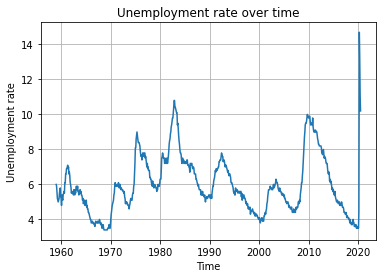

In [9]:
plt.plot(predictors.sasdate, predictors.UNRATE)
plt.xlabel("Time")
plt.ylabel("Unemployment rate")
plt.title("Unemployment rate over time")
plt.grid()

In [10]:
gp0_date_idx = [0] 
gp1_income_idx = [1, 2] + [i for i in range(6, 20)]
gp2_labor_market_idx = [i for i in range(20, 48)] + [120, 121, 122]
gp3_housing_idx = [i for i in range(48, 58)]
gp4_consumption_idx = [3, 4, 5] + [i for i in range(58, 64)] + [123]
gp5_money_idx = [i for i in range(64, 74)] +  [124, 125, 126, 127]
gp6_interest_idx = [i for i in range(78, 100)]
gp7_price_idx = [i for i in range(100, 119)]
gp8_stock_idx = [74, 75, 76, 77] + [128]

date = predictors.columns[gp0_date_idx]
gp1_income = predictors.columns[gp1_income_idx]
gp2_labor_market = predictors.columns[gp2_labor_market_idx]
gp3_housing = predictors.columns[gp3_housing_idx]
gp4_consumption = predictors.columns[gp4_consumption_idx]
gp5_money = predictors.columns[gp5_money_idx]
gp6_interest = predictors.columns[gp6_interest_idx]
gp7_price = predictors.columns[gp7_price_idx]
gp8_stock = predictors.columns[gp8_stock_idx]

target = "UNRATE"

#### Group 2: After removing the last row (2020/8), no NA values.

In [11]:
gp2 = predictors[gp2_labor_market]

In [12]:
gp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 31 columns):
HWI              739 non-null float64
HWIURATIO        739 non-null float64
CLF16OV          739 non-null int64
CE16OV           739 non-null int64
UNRATE           739 non-null float64
UEMPMEAN         739 non-null float64
UEMPLT5          739 non-null int64
UEMP5TO14        739 non-null int64
UEMP15OV         739 non-null int64
UEMP15T26        739 non-null int64
UEMP27OV         739 non-null int64
CLAIMSx          739 non-null int64
PAYEMS           739 non-null int64
USGOOD           739 non-null int64
CES1021000001    739 non-null float64
USCONS           739 non-null int64
MANEMP           739 non-null int64
DMANEMP          739 non-null int64
NDMANEMP         739 non-null int64
SRVPRD           739 non-null int64
USTPU            739 non-null int64
USWTRADE         739 non-null float64
USTRADE          739 non-null float64
USFIRE           739 non-null int64
USGOVT           

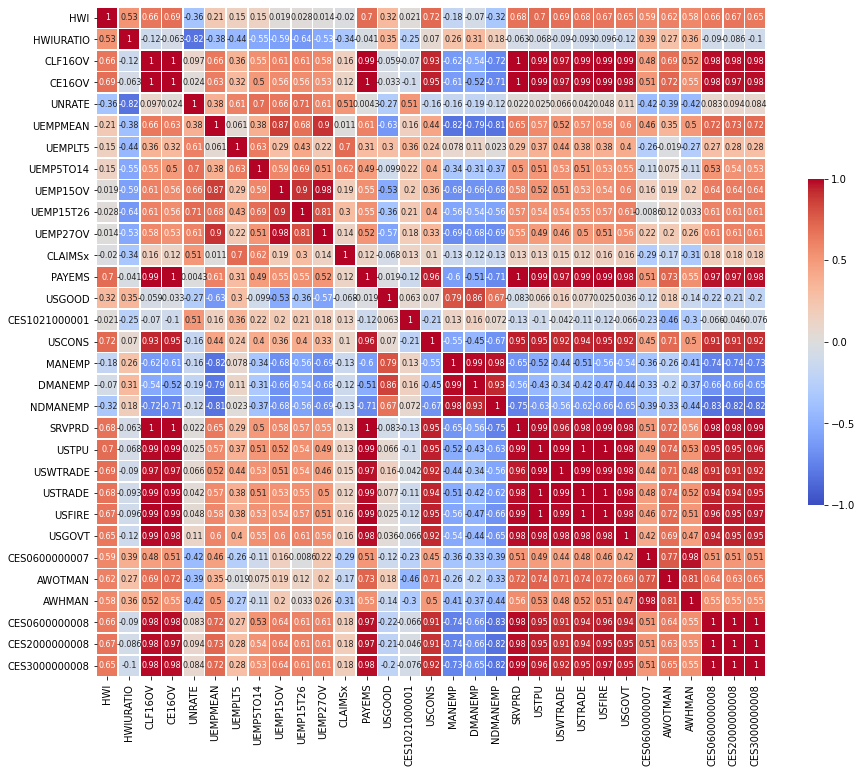

In [13]:
corr_heatmap(gp2, True, 8, figsize=(15,15))

##### Several variables have high correlation with UNRATE (postive or negative): "CES10210{5}1", "HWIURATIO", "UNEMPMEAN", "CLAIMSx"

### Group 1: no missing value

In [14]:
gp1 = predictors[gp1_income]

In [15]:
gp1.describe()

,RPI,W875RX1,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS
count,739.00000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,8405.87536,7222.200812,67.367550,70.368192,68.486749,79.517468,74.469677,82.461528,50.194231,63.781761,51.480070,85.880195,66.485108,73.185139,74.124999,79.288217
std,4275.40255,3441.142743,27.162589,27.393939,27.290689,24.090929,32.388420,21.141283,32.886525,27.604540,33.043169,23.464161,28.319991,26.837650,19.888513,5.207627
min,2437.29600,2288.800000,22.625000,23.458100,22.190400,32.407800,20.112600,37.728000,7.995500,20.206800,11.244900,30.537200,21.071400,20.203800,36.998800,59.906700
25%,4772.31800,4254.150000,44.982900,46.195350,44.266350,61.780400,47.622150,66.841600,19.292250,42.713300,23.753500,73.725900,42.455950,54.584050,63.156650,75.443600
50%,7682.72900,6722.000000,63.437200,70.379800,68.075100,81.290700,67.726200,87.393200,40.755200,55.856800,34.975100,97.476300,62.306000,74.879700,72.305600,79.131100
75%,12101.49200,10357.200000,95.109700,99.067750,97.045150,102.321000,108.465250,101.308700,82.963750,89.432450,84.100350,103.326200,96.677750,98.879150,88.419450,82.867800
max,19121.72400,14328.100000,110.551600,111.023800,108.641400,114.249000,125.766600,112.385000,103.885000,115.889800,110.016700,115.790800,110.079000,121.176100,114.205300,91.637900


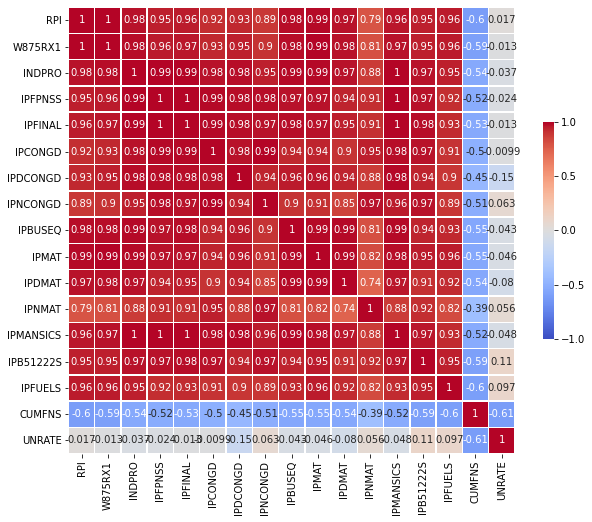

In [16]:
corr_heatmap(pd.concat([gp1, predictors["UNRATE"]], axis = 1), True, 10)

##### Only one variable has relatively high correlation with UNRATE: CUMFNS

### Group 3

In [17]:
gp3 = predictors[gp3_housing]

In [18]:
gp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 10 columns):
HOUST       739 non-null int64
HOUSTNE     739 non-null int64
HOUSTMW     739 non-null int64
HOUSTS      739 non-null int64
HOUSTW      739 non-null int64
PERMIT      727 non-null float64
PERMITNE    727 non-null float64
PERMITMW    727 non-null float64
PERMITS     727 non-null float64
PERMITW     727 non-null float64
dtypes: float64(5), int64(5)
memory usage: 57.9 KB


In [19]:
predictors[date][gp3.isnull().any(axis = 1)]

,sasdate
0,1959-01-01
1,1959-02-01
2,1959-03-01
3,1959-04-01
4,1959-05-01
5,1959-06-01
6,1959-07-01
7,1959-08-01
8,1959-09-01
9,1959-10-01


##### Here I simply remove the first 12 rows, corresponding to data in 1959.

In [20]:
gp3 = gp3[12:]

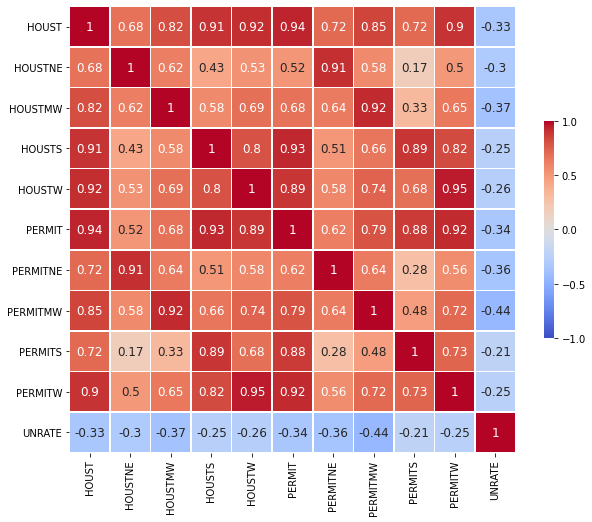

In [21]:
corr_heatmap(pd.concat([gp3, predictors["UNRATE"][12:]], axis = 1), True)

##### Nothing is very strongly correlated to UNRATE. 

#### Group 4

In [22]:
gp4 = predictors[gp4_consumption]

In [23]:
gp4.describe()

,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,ACOGNO,AMDMNOx,ANDENOx,AMDMUOx,BUSINVx,ISRATIOx,UMCSENTx
count,739.000000,7.380000e+02,739.000000,342.000000,739.000000,630.000000,7.390000e+02,7.390000e+02,739.000000,585.000000
mean,59.811617,8.221857e+05,192334.434658,154561.324561,119882.612368,44243.681237,4.596442e+05,8.249313e+05,1.477014,86.541026
std,31.142736,3.767955e+05,154446.538967,40405.095950,77208.768803,24143.298096,3.499728e+05,5.869584e+05,0.120633,12.430932
min,17.302000,2.809267e+05,18235.773920,86445.000000,13253.957810,6010.041362,3.937935e+04,8.488956e+04,1.240000,51.700000
25%,32.306500,5.059602e+05,46682.564845,117187.000000,40663.372045,24008.990615,1.538396e+05,2.479176e+05,1.390000,77.200000
50%,53.899000,7.454158e+05,154840.731100,155884.000000,114846.315600,44076.550190,4.303110e+05,7.919941e+05,1.498013,90.200000
75%,90.416500,1.167988e+06,331613.000000,191783.000000,187932.000000,65650.000000,5.618635e+05,1.265264e+06,1.570331,95.300000
max,121.894000,1.535612e+06,534558.000000,215709.000000,292371.000000,131973.000000,1.171856e+06,2.033707e+06,1.756291,112.000000


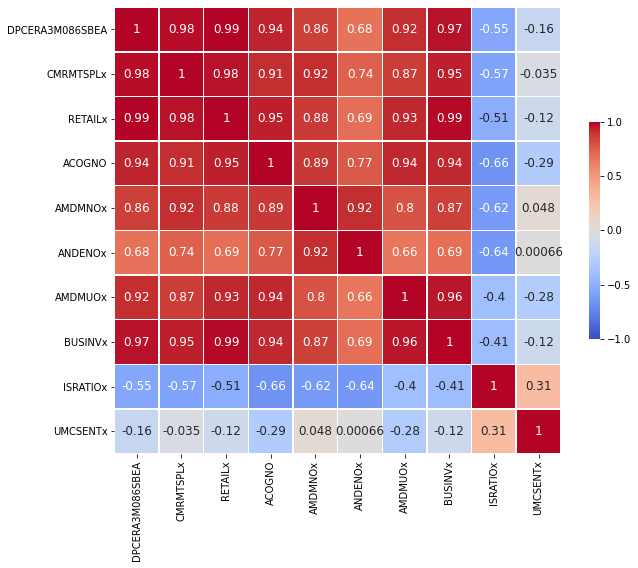

In [24]:
gp4_drop_rows = gp4.dropna()
corr_heatmap(gp4_drop_rows, True, 12)

##### We see that ACOGNO is strongly correlated with some other predictors. Drop this column as it has too many missing values. Moreover, UMCSENTx is not strongly correlated to other columns. We may want to preservee it first. 

In [25]:
gp4_test1 = gp4.drop(['ACOGNO'], axis = 1)
gp4_test1 = gp4_test1.dropna()

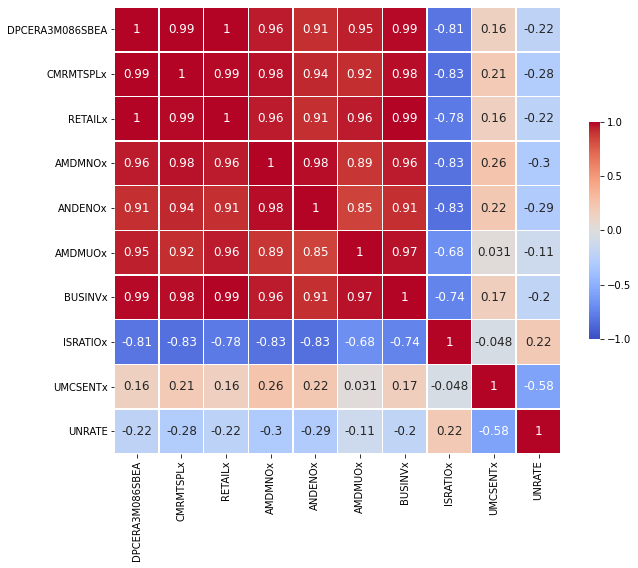

In [26]:
corr_heatmap(gp4_test1.join(predictors["UNRATE"]), True)

##### UMNCSENTx has the strongest correlation (negative). Here are 2 questions. 1, should we use UMNCSENTx as it has many missing values. 2, If we use UMNSENTx, should we select the not-null rows or impute them. 

### Group 5

In [27]:
gp5 = predictors[gp5_money]

In [28]:
gp5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 14 columns):
M1SL           739 non-null float64
M2SL           739 non-null float64
M2REAL         739 non-null float64
BOGMBASE       739 non-null int64
TOTRESNS       739 non-null float64
NONBORRES      739 non-null int64
BUSLOANS       739 non-null float64
REALLN         739 non-null float64
NONREVSL       739 non-null float64
CONSPI         739 non-null float64
MZMSL          739 non-null float64
DTCOLNVHFNM    739 non-null float64
DTCTHFNM       739 non-null float64
INVEST         739 non-null float64
dtypes: float64(12), int64(2)
memory usage: 81.0 KB


##### No missing values

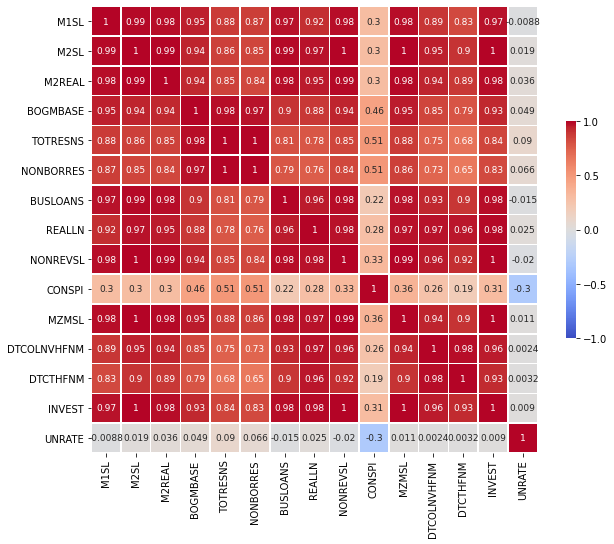

In [29]:
corr_heatmap(gp5.join(predictors["UNRATE"]), True, 9)

##### Nothing strongly correlated to UNRATE. 

### Group 6

In [30]:
gp6 = predictors[gp6_interest]

In [31]:
gp6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 22 columns):
FEDFUNDS         739 non-null float64
CP3Mx            738 non-null float64
TB3MS            739 non-null float64
TB6MS            739 non-null float64
GS1              739 non-null float64
GS5              739 non-null float64
GS10             739 non-null float64
AAA              739 non-null float64
BAA              739 non-null float64
COMPAPFFx        738 non-null float64
TB3SMFFM         739 non-null float64
TB6SMFFM         739 non-null float64
T1YFFM           739 non-null float64
T5YFFM           739 non-null float64
T10YFFM          739 non-null float64
AAAFFM           739 non-null float64
BAAFFM           739 non-null float64
TWEXAFEGSMTHx    571 non-null float64
EXSZUSx          739 non-null float64
EXJPUSx          739 non-null float64
EXUSUKx          739 non-null float64
EXCAUSx          739 non-null float64
dtypes: float64(22)
memory usage: 127.1 KB


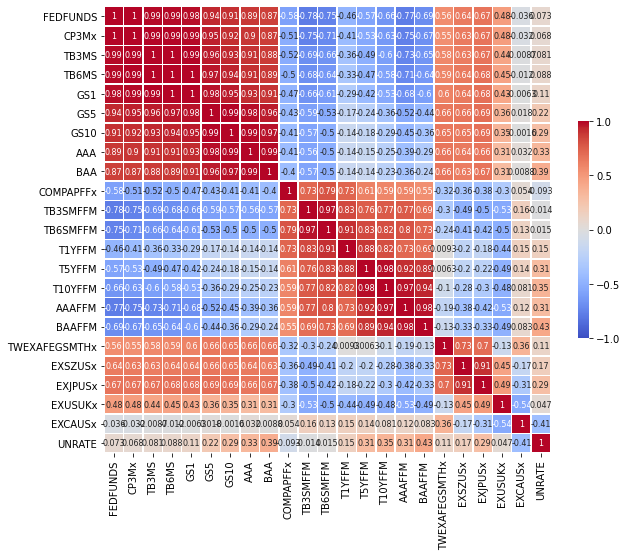

In [32]:
gp6_test1 = gp6.dropna()
corr_heatmap(gp6_test1.join(predictors["UNRATE"]), True, 8)

##### We don't see a strong correlation between TWEXAFEGSMTHx. Try remove it as it contains lots of null values.

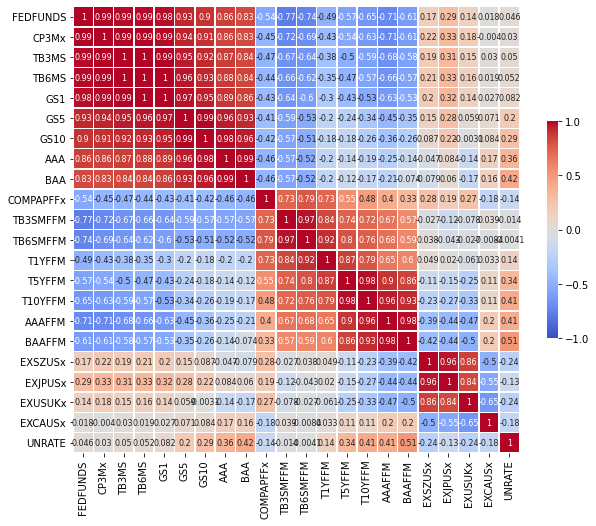

In [33]:
gp6_test2 = gp6.drop("TWEXAFEGSMTHx", axis = 1).dropna()
corr_heatmap(gp6_test2.join(predictors["UNRATE"]), True, 8)

##### BAAFFM has relatively high correlation

#### Group 7

In [33]:
gp7 = predictors[gp7_price]
gp7.describe()

,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAUCSL,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,111.066847,113.338024,108.286604,110.646820,30.082899,118.404465,127.900966,99.661101,115.213346,193.162273,111.298191,90.302080,144.034823,127.789537,123.857103,124.618103,59.259484,98.773556,57.968261
std,56.829077,60.490447,57.173908,66.227017,28.051203,64.972009,75.293306,31.372384,63.638639,154.851810,54.359535,32.685418,97.247849,75.316735,69.437431,71.447041,31.241879,27.411023,28.170088
min,33.000000,33.100000,30.400000,29.000000,2.920000,32.200000,28.970000,44.700000,29.300000,21.100000,33.200000,37.800000,22.900000,28.900000,30.700000,29.600000,16.074000,56.570000,17.777000
25%,51.300000,51.900000,51.050000,60.200000,10.110000,69.650000,48.800000,68.950000,45.600000,41.750000,52.900000,50.650000,43.300000,47.450000,50.900000,49.250000,26.060000,70.179000,29.545500
50%,114.600000,113.100000,112.500000,100.900000,20.342000,108.500000,125.400000,118.100000,115.400000,152.800000,117.800000,106.700000,133.700000,125.200000,122.900000,123.800000,61.281000,101.519000,60.217000
75%,153.200000,157.200000,150.050000,161.600000,39.890000,159.650000,192.750000,125.889500,168.451500,319.050000,157.850000,114.500000,227.450000,193.400000,182.950000,186.250000,85.914500,122.140500,80.671500
max,207.800000,220.100000,204.700000,303.400000,133.930000,322.100000,259.050000,135.100000,223.274000,523.255000,189.884000,129.700000,332.370000,258.624000,236.582000,246.917000,111.146000,140.457000,101.390000


##### No missing value

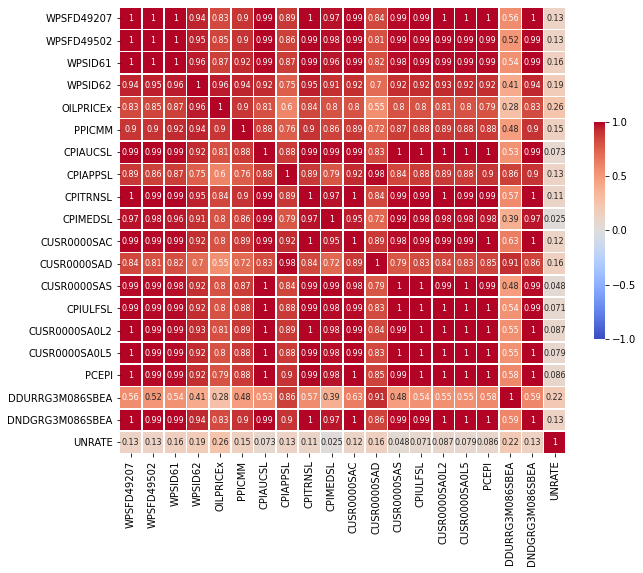

In [34]:
corr_heatmap(gp7.join(predictors["UNRATE"]), True, 8)

##### No much corerlation here

### Group 8

In [34]:
gp8 = predictors[gp8_stock]
gp8.describe()

,S&P 500,S&P: indust,S&P div yield,S&P PE ratio,VXOCLSx
count,739.000000,739.000000,738.000000,739.000000,697.000000
mean,707.996171,886.062368,2.925673,18.915917,19.171709
std,774.131260,1030.192071,1.116089,8.242171,7.410886
min,53.730000,56.900000,1.108074,6.569558,8.016400
25%,99.350000,109.650000,1.958140,14.610263,14.086700
50%,328.750000,381.110000,2.933357,18.444449,17.513800
75%,1198.105000,1421.945000,3.523942,21.795339,22.474400
max,3278.200000,4536.380000,6.237048,86.843117,67.151000


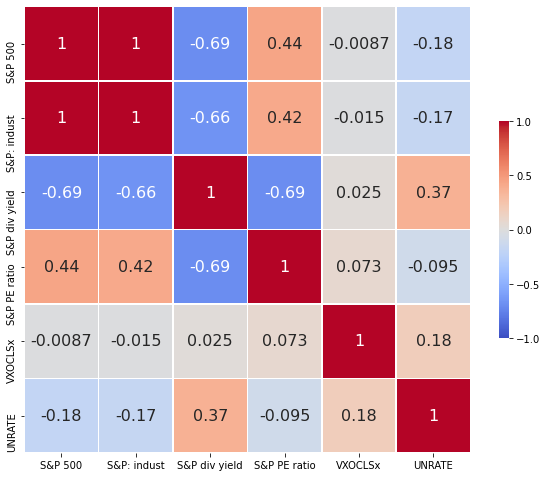

In [35]:
corr_heatmap(gp8.dropna().join(predictors["UNRATE"]), True, 16)

##### Let's try drop the VXOCLSx, which has lots of missing values.

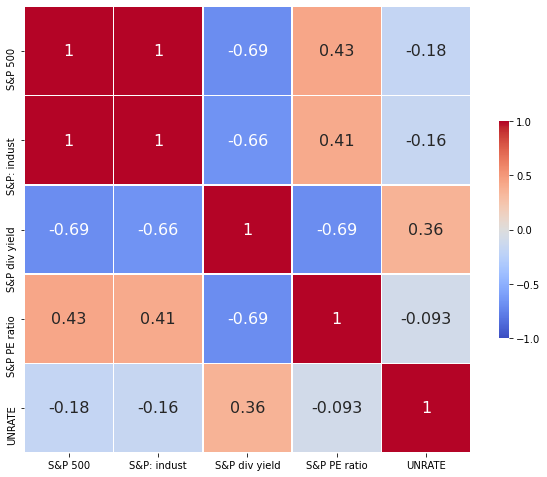

In [36]:
corr_heatmap(gp8.drop("VXOCLSx", axis = 1).dropna().join(predictors["UNRATE"]), True, 16)

##### Nothing very important. Perhaps stock markets are too unpredictable.

#### Initial pick: CUMFNS, BAAFFM, CLAIMSx, HWIURATIO, UEMPLT5, UEMP5TO14, UEMP15OV, UEMP15T26, UEMP27OV, CES1021000001

In [37]:
feature_test1 = predictors[["UNRATE", "CUMFNS", "BAAFFM", "CES1021000001", "CLAIMSx", "HWIURATIO", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26", "UEMP27OV"]].dropna()

In [38]:
feature_test1.columns

Index(['UNRATE', 'CUMFNS', 'BAAFFM', 'CES1021000001', 'CLAIMSx', 'HWIURATIO',
       'UEMPLT5', 'UEMP5TO14', 'UEMP15OV', 'UEMP15T26', 'UEMP27OV'],
      dtype='object')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

<Figure size 1440x720 with 0 Axes>

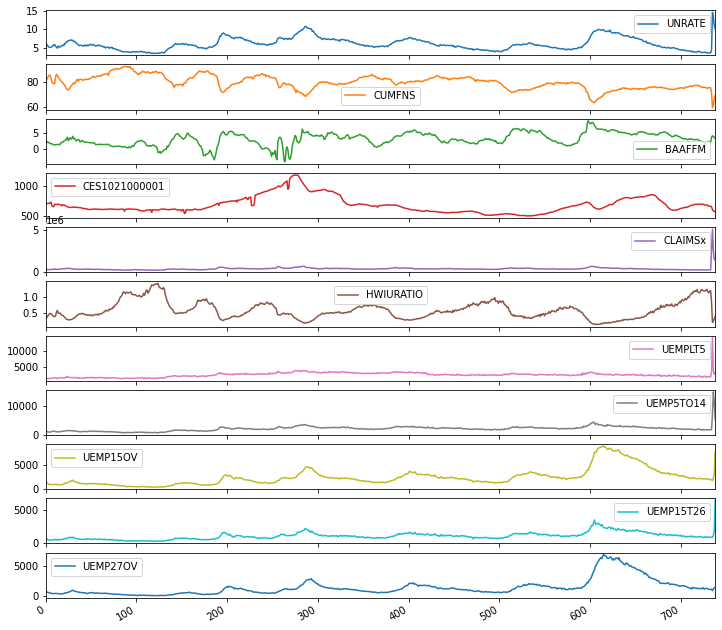

In [39]:
plt.figure(figsize=(20,10))
# plt.plot(feature_test1)
feature_test1.plot(subplots = True, figsize = (12,12))

### Feature importance via RF

In [77]:
from sklearn.model_selection import train_test_split
def explore_features(train_df, test_df = None, input_width = 1, label_width = 1, shift = 1, topK = 10):
    wg = Window_generator(input_width, label_width=label_width, shift=shift)
    wg.fit(train_df)
    x_train, y_train, col_names = wg.transform(train_df)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
    rf.fit(x_train, y_train)
    df_importance = pd.DataFrame(rf.feature_importances_, index = col_names)
    df_importance_sorted = df_importance.sort_values(by = 0, ascending = False)
    plt.plot(df_importance_sorted.index[:topK], df_importance_sorted[:topK], marker = ".")
    plt.xlabel("Feature name")
    plt.ylabel("Feature importance")
    plt.xticks(rotation = 315)
    return df_importance_sorted[:topK]

In [78]:
data_feature_test_1 = data_2020_removed[corr_featrues]
train_df, test_df = train_test_split(data_feature_test_1, test_size = 0.2, shuffle = False)

,0
UNRATE_1m,0.937987
UNRATE_2m,0.027582
UEMP15T26_1m,0.004939
UEMP5TO14_2m,0.004427
CUMFNS_1m,0.003219
UEMP5TO14_3m,0.003042
HWIURATIO_1m,0.002753
CLAIMSx_1m,0.001652
UEMP15T26_2m,0.001222
CLAIMSx_2m,0.001191


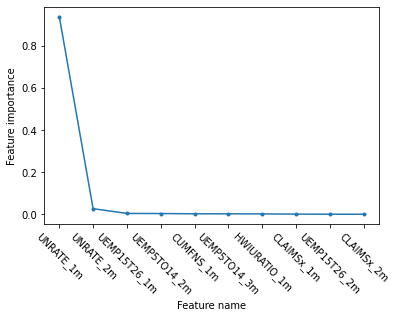

In [79]:
top10 = explore_features(train_df, test_df, 3, 1, topK=10)
top10

More than 95 percent weight were given to UNRATE.

### 1.2. Generate time window data

In [40]:
data_2020_removed = predictors[:-7]

Reference:

[1]"Time Series Forecasting: TensorFlow Core." *TensorFlow*, www.tensorflow.org/tutorials/structured_data/time_series. 

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
############# CITATION

class Window_generator(BaseEstimator, TransformerMixin):
    def __init__(self, input_window_length, label_width = 1, shift = 1, label_columns = ["UNRATE"]):
        self.input_window_length = input_window_length
        self.label_width = label_width
        self.shift = shift
        self.label_columns = label_columns
        self.total_window_length = input_window_length + label_width + shift - 1
        
        
    def fit(self, X, y=None):
        self.X = X
        self.start_indices = [i for i in range(X.shape[0] - self.total_window_length + 1)]  
        self.end_indices = [i + self.input_window_length - 1 for i in self.start_indices]
        self.label_start = [i + self.input_window_length + self.shift - 1 for i in self.start_indices]
        self.label_end = [i + self.total_window_length - 1 for i in self.start_indices]
        self.columns = X.columns
        return self
    
    def _get_windows_indices(self):
        input_indices = []
        label_indices = []
        for i in range(len(self.start_indices)):
            input_indices.append(np.arange(self.input_window_length) + i)
            label_indices.append(np.arange(self.label_start[i], self.label_end[i] + 1))
        return (np.array(input_indices), np.array(label_indices))
    
    def create_window_data(self):
        input_indices, label_indices = self._get_windows_indices()
        labels = self.X[self.label_columns]
        return self.X.values[input_indices], labels.values[label_indices]
    
    def transform(self, X, y=None):
        input_window, label_window = self.create_window_data()
        input_flatten = input_window.reshape(input_window.shape[0], -1)
        label_flatten = label_window.reshape(label_window.shape[0], -1)
        orig_column_list = self.columns.tolist()
        # Returns the column names in the following format: "Col_name_{n}m", meaning the feature at n month ago
        column_names = ["{}_{}m".format(i, j + self.shift) for j in range(self.input_window_length - 1, -1, -1) for i in orig_column_list]
        return input_flatten, label_flatten, column_names
        
    def __repr__(self):
        return '\n'.join([
            f'start_indices: {self.start_indices}',
            f'end_indices: {self.end_indices}',
            f'label_start: {self.label_start}',
            f'label_end: {self.label_end}'])

## 2. Baseline model: Use all features given

In [42]:
baseline1_dataset = predictors.dropna()

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [44]:
df_base1 = data_2020_removed.dropna(axis = 1).drop("sasdate", axis = 1)
df_train, df_test = train_test_split(df_base1, test_size = 0.2, shuffle = False)
scaler = StandardScaler()
scaler.fit(df_train.values)
df_train_scaled = pd.DataFrame(scaler.transform(df_train.values), columns=df_train.columns)
df_test_scaled = pd.DataFrame(scaler.transform(df_test.values), columns=df_test.columns)

wg = Window_generator(3,1)
x_train, y_train, col_names = wg.fit_transform(df_train_scaled)
x_test, y_test, _ = wg.fit_transform(df_test_scaled)

In [45]:
y_std = df_train["UNRATE"].std()
y_mean = df_train["UNRATE"].mean()

Train mse: 0.007520221720284575
Test mse: 162.54704532887507
Train mae: 0.06767379886478954
Test mae: 10.852754942236768


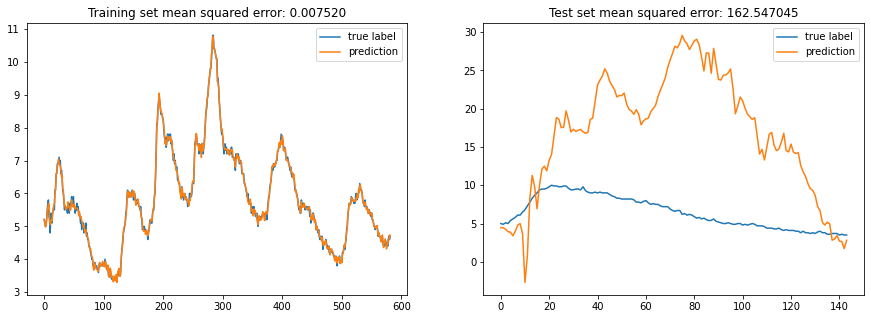

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
test_prediction = lin_reg.predict(x_test) * y_std + y_mean
test_mse = mean_squared_error(test_prediction, y_test * y_std + y_mean)
train_prediction = lin_reg.predict(x_train) * y_std + y_mean
train_mse = mean_squared_error(train_prediction , y_train * y_std + y_mean)
print("Train mse:", train_mse)
print("Test mse:", test_mse)
test_mae = mean_absolute_error(test_prediction, y_test * y_std + y_mean)
train_mae = mean_absolute_error(train_prediction , y_train * y_std + y_mean)
print("Train mae:", train_mae)
print("Test mae:", test_mae)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(y_train * y_std + y_mean, label = "true label")
axes[0].plot(train_prediction, label = "prediction")
axes[0].legend()
axes[0].set_title("Training set mean squared error: %f" % train_mse)
axes[1].plot(y_test * y_std + y_mean, label = "true label")
axes[1].plot(test_prediction, label = "prediction")
axes[1].legend()
axes[1].set_title("Test set mean squared error: %f" % test_mse)
plt.show()

                        value
PCEPI_2m            45.075849
DSERRG3M086SBEA_1m  34.519299
UEMP15OV_1m         30.267571
UEMP15OV_3m         25.957796
INDPRO_2m           15.151866
UEMP15OV_2m         12.231143
DNDGRG3M086SBEA_1m  11.705411
CPIAUCSL_2m         11.321820
IPCONGD_1m           7.716294
USGOOD_2m            7.358862


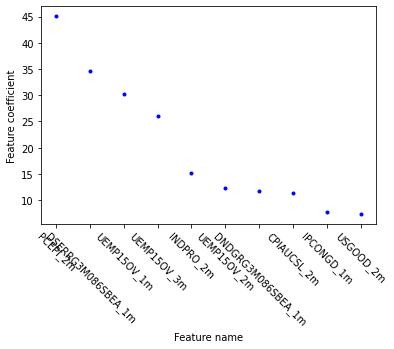

In [47]:
feature_coefs = pd.DataFrame(lin_reg.coef_.T, index=col_names, columns=["value"]).sort_values(by = "value", ascending=False)
print(feature_coefs[:10])
plt.plot(feature_coefs[:10], "b.")
plt.xlabel("Feature name")
plt.ylabel("Feature coefficient")
plt.xticks(rotation = 315)
plt.show()

## 3. Machine learning models

### 3.1 Linear Regression

#### 3.1.1 Linear Regression with 11 features. 2020 data EXCLUDED.

In [55]:
def fit_LR_forecast(x_train, y_train, y_mean, y_std):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    test_prediction = lin_reg.predict(x_test) * y_std + y_mean
    test_mse = mean_squared_error(test_prediction, y_test * y_std + y_mean)
    train_prediction = lin_reg.predict(x_train) * y_std + y_mean
    train_mse = mean_squared_error(train_prediction , y_train * y_std + y_mean)
    print("Train mse:", train_mse)
    print("Test mse:", test_mse)
    test_mae = mean_absolute_error(test_prediction, y_test * y_std + y_mean)
    train_mae = mean_absolute_error(train_prediction , y_train * y_std + y_mean)
    print("Train mae:", train_mae)
    print("Test mae:", test_mae)
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    axes[0].plot(y_train * y_std + y_mean, label = "true label")
    axes[0].plot(train_prediction, label = "prediction")
    axes[0].legend()
    axes[0].set_title("Training set mean squared error: %f" % train_mse)
    axes[1].plot(y_test * y_std + y_mean, label = "true label")
    axes[1].plot(test_prediction, label = "prediction")
    axes[1].legend()
    axes[1].set_title("Test set mean squared error: %f" % test_mse)
    plt.show()

In [56]:
corr_featrues = ["CUMFNS", "BAAFFM", "CES1021000001", "CLAIMSx", "HWIURATIO", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26", "UEMP27OV", "UNRATE"]
df_base2 = data_2020_removed[corr_featrues].dropna()
df_train, df_test = train_test_split(df_base2, test_size = 0.2, shuffle = False)
scaler.fit(df_train.values)
df_train_scaled = pd.DataFrame(scaler.transform(df_train.values), columns=df_train.columns)
df_test_scaled = pd.DataFrame(scaler.transform(df_test.values), columns=df_test.columns)

wg = Window_generator(3,1)
x_train, y_train, col_names = wg.fit_transform(df_train_scaled)
x_test, y_test, _ = wg.fit_transform(df_test_scaled)
y_std = df_train["UNRATE"].std()
y_mean = df_train["UNRATE"].mean()

Train mse: 0.020959864310245064
Test mse: 0.09402145074791214
Train mae: 0.11198763299437538
Test mae: 0.24577608956130645


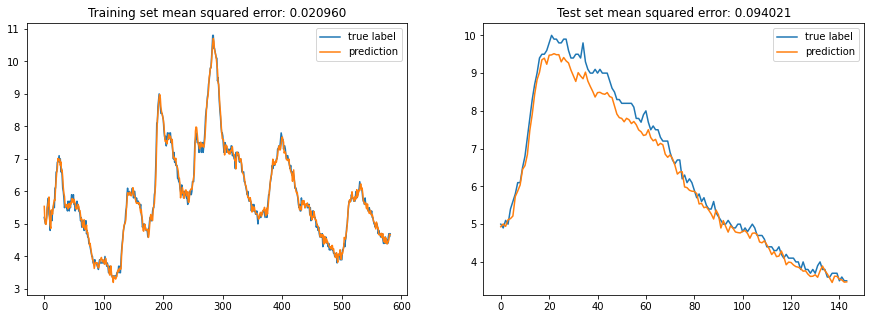

In [57]:
fit_LR_forecast(x_train, y_train, y_mean, y_std)

#### 3.1.2 Linear Regression with 1 feature. 2020 data EXCLUDED.

In [58]:
df_base1 = data_2020_removed[["UNRATE"]]
df_train, df_test = train_test_split(df_base1, test_size = 0.2, shuffle = False)
scaler = StandardScaler()
scaler.fit(df_train.values)
df_train_scaled = pd.DataFrame(scaler.transform(df_train.values), columns=df_train.columns)
df_test_scaled = pd.DataFrame(scaler.transform(df_test.values), columns=df_test.columns)

wg = Window_generator(3,1)
x_train, y_train, col_names = wg.fit_transform(df_train_scaled)
x_test, y_test, _ = wg.fit_transform(df_test_scaled)

Train mse: 0.029477487101737188
Test mse: 0.02782864523403687
Train mae: 0.12981764464889553
Test mae: 0.13036144432954477


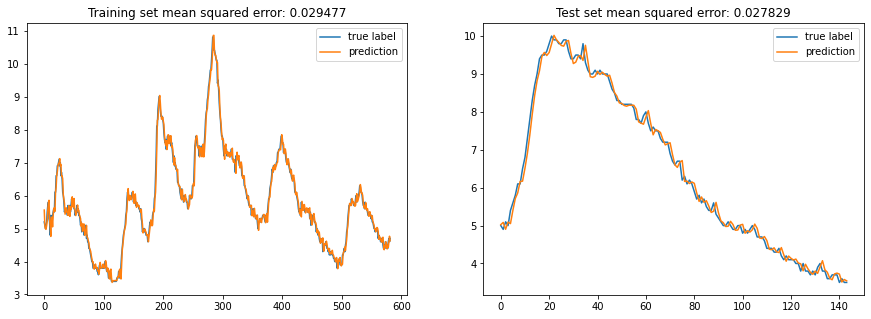

In [59]:
fit_LR_forecast(x_train, y_train, y_mean, y_std)

#### 3.1.3 Linear Regression with 11 feature. 2020 data INCLUDED.

Train mse: 0.021002811705388744
Test mse: 0.8366227609216457
Train mae: 0.11199717320137469
Test mae: 0.36541494594813656


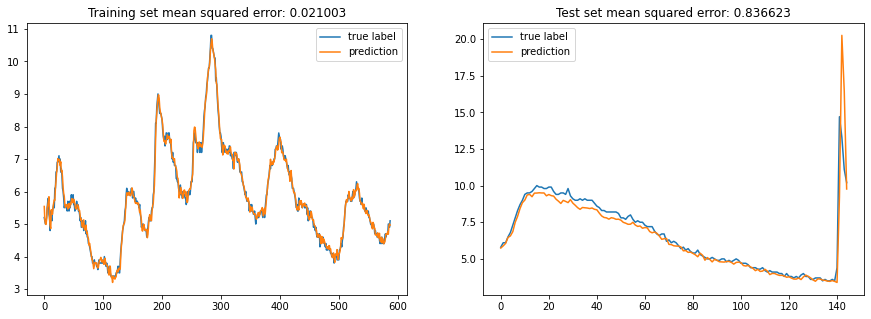

In [60]:
df_base2 = predictors[corr_featrues].dropna()
df_train, df_test = train_test_split(df_base2, test_size = 0.2, shuffle = False)
scaler.fit(df_train.values)
df_train_scaled = pd.DataFrame(scaler.transform(df_train.values), columns=df_train.columns)
df_test_scaled = pd.DataFrame(scaler.transform(df_test.values), columns=df_test.columns)

wg = Window_generator(3,1)
x_train, y_train, col_names = wg.fit_transform(df_train_scaled)
x_test, y_test, _ = wg.fit_transform(df_test_scaled)
y_std = df_train["UNRATE"].std()
y_mean = df_train["UNRATE"].mean()

fit_LR_forecast(x_train, y_train, y_mean, y_std)

#### 3.1.4 Linear Regression with 1 feature. 2020 data INCLUDED.

Train mse: 0.029445132736815195
Test mse: 0.9377422492704742
Train mae: 0.12976124669384287
Test mae: 0.2497339139257888


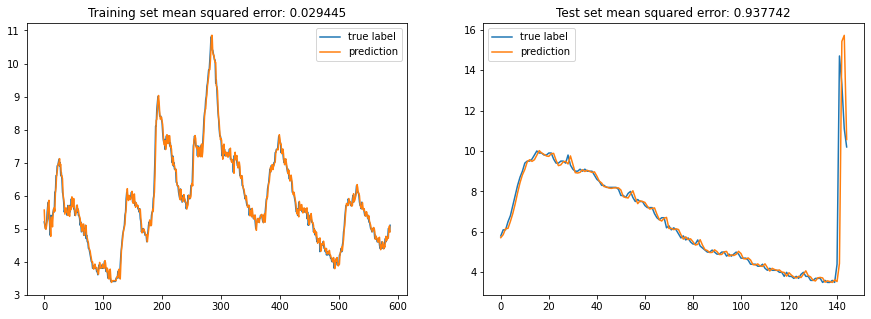

In [61]:
df_base2 = predictors[["UNRATE"]].dropna()
df_train, df_test = train_test_split(df_base2, test_size = 0.2, shuffle = False)
scaler.fit(df_train.values)
df_train_scaled = pd.DataFrame(scaler.transform(df_train.values), columns=df_train.columns)
df_test_scaled = pd.DataFrame(scaler.transform(df_test.values), columns=df_test.columns)

wg = Window_generator(3,1)
x_train, y_train, col_names = wg.fit_transform(df_train_scaled)
x_test, y_test, _ = wg.fit_transform(df_test_scaled)
y_std = df_train["UNRATE"].std()
y_mean = df_train["UNRATE"].mean()

fit_LR_forecast(x_train, y_train, y_mean, y_std)

### 3.2 Random Forest

In [88]:
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as sklearn_train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [82]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('Econ_predictors_2020-08.csv', header=0, index_col=0)

In [83]:
series = series[:-7]

In [85]:
differenced = series.diff(12)
differenced = differenced[12:]
differenced.to_csv('seasonally_adjusted.csv', index = False)

In [86]:
from pandas import DataFrame
series1 = read_csv('seasonally_adjusted.csv', header = 0)
dataframe = DataFrame()
for i in range(12, 0, -1):
    dataframe['t-'+str(i)] = series1.UNRATE.shift(i)
dataframe['t'] = series1.UNRATE
print(dataframe.head(13))
dataframe = dataframe[13:]
dataframe.to_csv('lags_12months_features.csv', index= False)


    t-12  t-11  t-10  t-9  t-8  t-7  t-6  t-5  t-4  t-3  t-2  t-1    t
0    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN -0.8
1    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN -0.8 -1.1
2    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN -0.8 -1.1 -0.2
3    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN -0.8 -1.1 -0.2  0.0
4    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN -0.8 -1.1 -0.2  0.0  0.0
5    NaN   NaN   NaN  NaN  NaN  NaN  NaN -0.8 -1.1 -0.2  0.0  0.0  0.4
6    NaN   NaN   NaN  NaN  NaN  NaN -0.8 -1.1 -0.2  0.0  0.0  0.4  0.4
7    NaN   NaN   NaN  NaN  NaN -0.8 -1.1 -0.2  0.0  0.0  0.4  0.4  0.4
8    NaN   NaN   NaN  NaN -0.8 -1.1 -0.2  0.0  0.0  0.4  0.4  0.4  0.0
9    NaN   NaN   NaN -0.8 -1.1 -0.2  0.0  0.0  0.4  0.4  0.4  0.0  0.4
10   NaN   NaN  -0.8 -1.1 -0.2  0.0  0.0  0.4  0.4  0.4  0.0  0.4  0.3
11   NaN  -0.8  -1.1 -0.2  0.0  0.0  0.4  0.4  0.4  0.0  0.4  0.3  1.3
12  -0.8  -1.1  -0.2  0.0  0.0  0.4  0.4  0.4  0.0  0.4  0.3  1.3  1.4


[0.00730165 0.00472428 0.00598448 0.00441409 0.0053222  0.00415535
 0.00472165 0.00501214 0.0044177  0.00596734 0.00821919 0.93975993]


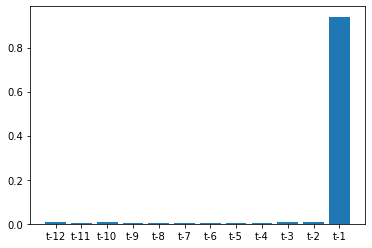

In [87]:
from sklearn.ensemble import RandomForestRegressor
dataframe = read_csv('lags_12months_features.csv', header = 0)
array = dataframe.values
model = RandomForestRegressor(n_estimators=500, random_state=1)
X = array[:, 0:-1]
y = array[:, -1]
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [90]:
predictors = dataframe[['t-2', 't-3', 't-1']]
target = dataframe[['t']]
x_train, x_cv, y_train, y_cv = sklearn_train_test_split(predictors, target, test_size=0.2, random_state=1)
def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred = lin.predict(x_cv)
    lin_r = r2_score(y_cv, y_pred)
    s.append(lin_r)
model = RandomForestRegressor(n_estimators=500, random_state=1)
#Checking the scores by using our function
algos = [LinearRegression, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor, DecisionTreeRegressor]
s = []
for i in algos:
    scores(i)

In [91]:
# Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegression', 'RandomForestRegression',
    'GradientBoostingRegressor', 'DecisionTreeRegression'],
    'Score': [s[0], s[1], s[2], s[3], s[4]]
})
models.sort_values(by="Score", ascending=False)

,Method,Score
0,LinearRegression,0.951646
3,GradientBoostingRegressor,0.948449
2,RandomForestRegression,0.940530
1,KNeighborsRegression,0.940459
4,DecisionTreeRegression,0.926149


As we have evaluated, the RandomForestRegressor will be the best algorithm for our given dataset. So we will run it and see how it performs later

#### 3.2.1 Random Forest with 1 feature (Only use the UNRATE). 2020 data excluded

Reference:

[2] Brownlee, Jason. "Random Forest for Time Series Forecasting." *Machine Learning Mastery*, 31 Oct. 2020, machinelearningmastery.com/random-forest-for-time-series-forecasting/.  

In [92]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction

	## yhat = model.predict([testX])
	yhat = model.predict(testX)
	return yhat##yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions
 
# load the dataset
values = series.loc[:,'UNRATE'].values.tolist() ## train set
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=3)
# evaluate
# mae, y, yhat = walk_forward_validation(data, 146)

#### Hyperparameter tuning

In [94]:
rf_train_val_df, rf_test_df = sklearn_train_test_split(data, test_size = 0.2, shuffle = False)
rf_train_df, rf_val_df = sklearn_train_test_split(rf_train_val_df, test_size = 0.2, shuffle = False)

In [95]:
from sklearn.model_selection import PredefinedSplit
rf_train_X = rf_train_df[:, :-1]
rf_train_y = rf_train_df[:, -1]
rf_val_X = rf_val_df[:, :-1]
rf_val_y = rf_val_df[:, -1]
rf_test_X = rf_test_df[:, :-1]
rf_test_y = rf_test_df[:, -1]
rf_x_train_and_val = np.vstack((rf_train_X, rf_val_X))
print(rf_x_train_and_val.shape)
rf_y_train_and_val = np.vstack((rf_train_y.reshape(467, 1), rf_val_y.reshape(117, 1)))
rf_split = [-1 for _ in range(rf_train_X.shape[0])] + [0 for _ in range(rf_val_X.shape[0])]
rf_cv = PredefinedSplit(rf_split)
for train, test in rf_cv.split():
    print(train[-1])
    print(test[-1])

(584, 3)
466
583


In [96]:
from sklearn.model_selection import GridSearchCV
def rf_evaluate(model, x_train, y_train, x_val, y_val):
    train_pred = model.predict(x_train)
    val_pred = model.predict(x_val)
    print("Train MSE:", mean_squared_error(train_pred, y_train))
    print("Val MSE:" , mean_squared_error(val_pred, y_val))

In [97]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [99]:
# First create the base model to tune
rf_base = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions=random_grid,
                            n_iter=100,
                            cv = rf_cv,
                            verbose=0,
                            random_state = 42,
                            n_jobs=-1
)
rf_random.fit(rf_x_train_and_val, rf_y_train_and_val)

Fitting 1 folds for each of 100 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [101]:
base_model = RandomForestRegressor(n_estimators = 10, random_state=42)
base_model.fit(rf_x_train_and_val, rf_y_train_and_val)
rf_evaluate(base_model, rf_train_X, rf_train_y, rf_val_X, rf_val_y)

Train MSE: 0.010545923526137794
Val MSE: 0.0055637809523540445


In [102]:
best_random = rf_random.best_estimator_
rf_evaluate(best_random, rf_train_X, rf_train_y, rf_val_X, rf_val_y)

Train MSE: 0.024385736671962966
Val MSE: 0.011086460698593726


In [105]:
# Create the parameter grid based on the results of random search
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120, 130],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf_nbase = RandomForestRegressor()

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf_nbase, param_grid= rf_param_grid,
                                cv = rf_cv, n_jobs = -1, verbose=2)

In [106]:
rf_grid_search.fit(rf_x_train_and_val, rf_y_train_and_val)

Fitting 1 folds for each of 288 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   53.5s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100, 110, 120, 130],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [107]:
rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 130,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [108]:
rf_evaluate(rf_grid_search.best_estimator_, rf_train_X, rf_train_y, rf_val_X, rf_val_y)

Train MSE: 0.02100912862792294
Val MSE: 0.009897187268568771


Train mse: 0.02172132693072289
Test mse: 0.03534874795579933
Train mae: 0.10946218082149371
Test mae: 0.14414150593821803


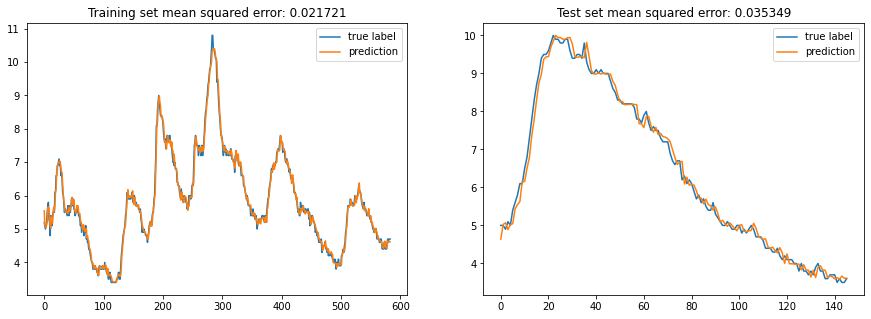

In [109]:
rf_train_prediction = best_random.predict(rf_x_train_and_val)
rf_train_mse = mean_squared_error(rf_train_prediction, rf_y_train_and_val)
rf_test_prediction = best_random.predict(rf_test_X)
rf_test_mse = mean_squared_error(rf_test_prediction, rf_test_y)
print("Train mse:", rf_train_mse)
print("Test mse:" ,rf_test_mse)
rf_train_mae = mean_absolute_error(rf_train_prediction, rf_y_train_and_val)
rf_test_mae = mean_absolute_error(rf_test_prediction, rf_test_y)
print("Train mae:", rf_train_mae)
print("Test mae:", rf_test_mae)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(rf_y_train_and_val, label = "true label")
axes[0].plot(rf_train_prediction, label = "prediction")
axes[0].legend()
axes[0].set_title("Training set mean squared error: %f" % rf_train_mse)
axes[1].plot(rf_test_y, label = "true label")
axes[1].plot(rf_test_prediction, label = "prediction")
axes[1].legend()
axes[1].set_title("Test set mean squared error: %f" % rf_test_mse)
plt.show()

#### 3.2.2 Random Forest with 11 features. 2020 data excluded.

In [110]:
rf10_dataset = series[["CUMFNS", "BAAFFM", "CLAIMSx", "HWIURATIO", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26", "UEMP27OV", "CES1021000001", "UNRATE"]]
rf10_values = rf10_dataset.values.tolist()
rf10_data = series_to_supervised(rf10_values, n_in=3)
## rf10_mae, rf10_y, rf10_yhat = walk_forward_validation(rf10_data, 146)
rf10_data_X = rf10_data[:, :33]
rf10_data_y = rf10_data[:, -1]

In [111]:
rf10_ndata = np.hstack((rf10_data_X, rf10_data_y.reshape(730,1)))
rf10_ndata.shape

(730, 34)

In [112]:
rf10_train_val_df, rf10_test_df = sklearn_train_test_split(rf10_ndata, test_size = 0.2, shuffle = False)
rf10_train_df, rf10_val_df = sklearn_train_test_split(rf10_train_val_df, test_size = 0.2, shuffle = False)

In [113]:
rf10_train_X = rf10_train_df[:, :-1]
rf10_train_y = rf10_train_df[:, -1]
rf10_val_X = rf10_val_df[:, :-1]
rf10_val_y = rf10_val_df[:, -1]
rf10_test_X = rf10_test_df[:, :-1]
rf10_test_y = rf10_test_df[:, -1]
rf10_x_train_and_val = np.vstack((rf10_train_X, rf10_val_X))
print(rf10_x_train_and_val.shape)
rf10_y_train_and_val = np.vstack((rf10_train_y.reshape(467, 1), rf10_val_y.reshape(117, 1)))
rf10_split = [-1 for _ in range(rf10_train_X.shape[0])] + [0 for _ in range(rf10_val_X.shape[0])]

rf10_cv = PredefinedSplit(rf10_split)
for train, test in rf10_cv.split():
    print(train[-1])
    print(test[-1])

(584, 33)
466
583


In [114]:
rf10_base = RandomForestRegressor()
rf10_random = RandomizedSearchCV(estimator = rf10_base, param_distributions=random_grid,
                            n_iter=100,
                            cv = rf_cv,
                            verbose=2,
                            random_state = 42,
                            n_jobs=-1
)
rf10_random.fit(rf10_x_train_and_val, rf10_y_train_and_val)

Fitting 1 folds for each of 100 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [115]:
rf10_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [117]:
base_model_rf10 = RandomForestRegressor(n_estimators = 10, random_state=42)
base_model_rf10.fit(rf10_x_train_and_val, rf10_y_train_and_val)
rf_evaluate(base_model_rf10, rf10_train_X, rf10_train_y, rf10_val_X, rf10_val_y)

Train MSE: 0.006279229122055678
Val MSE: 0.0023418803418803493


In [118]:
best_random_rf10 = rf10_random.best_estimator_
rf_evaluate(best_random_rf10, rf10_train_X, rf10_train_y, rf10_val_X, rf10_val_y)

Train MSE: 0.013713031538593658
Val MSE: 0.005737407393309268


In [122]:
# Create the parameter grid based on the results of random search
rf10_param_grid = {
    'bootstrap': [True],
    'max_depth': [70,80, 100, 120],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [1200, 1400, 1600, 1800]
}

# Create a base model
rf10_nbase = RandomForestRegressor()

# Instantiate the grid search model
rf10_grid_search = GridSearchCV(estimator = rf10_nbase, param_grid= rf10_param_grid,
                                cv = rf_cv, n_jobs = -1, verbose=2)

In [123]:
rf10_grid_search.fit(rf10_x_train_and_val, rf10_y_train_and_val)

Fitting 1 folds for each of 576 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 11.8min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [70, 80, 100, 120],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1200, 1400, 1600, 1800]},
             verbose=2)

In [124]:
rf10_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [125]:
rf10_grid_best = rf10_grid_search.best_estimator_
rf_evaluate(rf10_grid_best, rf10_train_X, rf10_train_y, rf10_val_X, rf10_val_y)

Train MSE: 0.012151844489520353
Val MSE: 0.004946366245337102


Train mse: 0.010708281211148024
Test mse: 0.19051991003490004
Train mae: 0.07270555883551011
Test mae: 0.3826280415759205


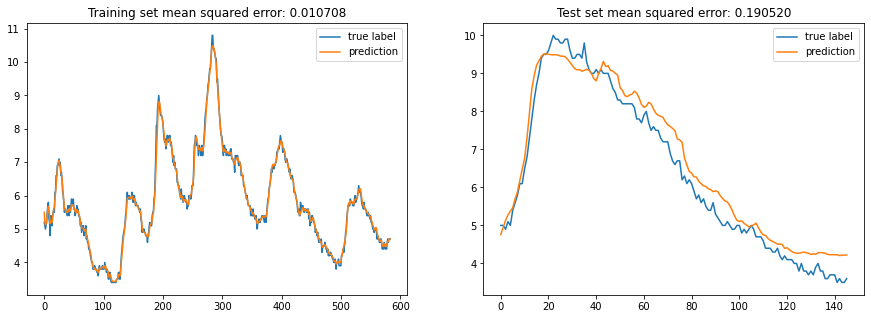

In [126]:
rf10_train_prediction = rf10_grid_best.predict(rf10_x_train_and_val)
rf10_train_mse = mean_squared_error(rf10_train_prediction, rf10_y_train_and_val)
rf10_test_prediction = rf10_grid_best.predict(rf10_test_X)
rf10_test_mse = mean_squared_error(rf10_test_prediction, rf10_test_y)
print("Train mse:", rf10_train_mse)
print("Test mse:" ,rf10_test_mse)
rf10_train_mae = mean_absolute_error(rf10_train_prediction, rf10_y_train_and_val)
rf10_test_mae = mean_absolute_error(rf10_test_prediction, rf10_test_y)
print("Train mae:", rf10_train_mae)
print("Test mae:", rf10_test_mae)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(rf10_y_train_and_val, label = "true label")
axes[0].plot(rf10_train_prediction, label = "prediction")
axes[0].legend()
axes[0].set_title("Training set mean squared error: %f" % rf10_train_mse)
axes[1].plot(rf10_test_y, label = "true label")
axes[1].plot(rf10_test_prediction, label = "prediction")
axes[1].legend()
axes[1].set_title("Test set mean squared error: %f" % rf10_test_mse)
plt.show()

Reference

[3] Brownlee, Jason. "Bagging and Random Forest Ensemble Algorithms for Machine Learning." *Machine Learning Mastery*, 2 Dec. 2020, machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/

[4] JainAarshay, Aarshay. "XGBoost Parameters: XGBoost Parameter Tuning." *Analytics Vidhya*, 23 Nov. 2020, www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/. 

### 3.3.1 XGBoost with one feature. 2020 data EXCLUDED

In [132]:
import xgboost
# define model
model = xgboost.XGBRegressor()

In [133]:
values = series.loc[:,'UNRATE'].values.tolist()
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=3) # three months to predict one month

#### Hyperparameter Tunning 

In [134]:
xg_train_val_df, xg_test_df = sklearn_train_test_split(data, test_size=0.2, shuffle = False)
xg_train_df, xg_val_df = sklearn_train_test_split(xg_train_val_df, test_size=0.2, shuffle = False)

In [138]:
# Since we are *NOT* using cv, for the cv parameter we input a predefinedsplit
from xgboost import XGBRegressor
xg_trainX = xg_train_df[:, :-1]
xg_trainy = xg_train_df[:, -1]
xg_valX = xg_val_df[:, :-1]
xg_valy = xg_val_df[:, -1]
xg_testX = xg_test_df[:, :-1]
xg_testy = xg_test_df[:, -1]
xg_x_train_and_val = np.vstack((xg_trainX, xg_valX))
print(xg_x_train_and_val.shape)
xg_y_train_and_val = np.vstack((xg_trainy.reshape(467, 1), xg_valy.reshape(117, 1)))

split = [-1 for _ in range(xg_trainX.shape[0])] + [0 for _ in range(xg_valX.shape[0])]
cv = PredefinedSplit(split)
for train,test in cv.split():
    print(train[-1])
    print(test[-1])

(584, 3)
466
583


In [148]:
from sklearn.model_selection import GridSearchCV
def xgb_model_fit(regressor, x_train, y_train, x_val, y_val):
    regressor.fit(x_train, y_train, eval_metric = "rmse")
    train_pred = regressor.predict(x_train)
    val_pred = regressor.predict(x_val)
    print("Train MSE:", mean_squared_error(train_pred, y_train))
    print("Val MSE:", mean_squared_error(val_pred, y_val))

In [149]:
xgb_base = XGBRegressor(learning_rate=0.1,
                         n_estimators=50,
                         max_depth=7,
                         min_child_weight=1,
                         gamma=0,
                         subsample=0.7,
                         colsample_bytree=0.9,
                         objective= 'reg:squarederror',
                         nthread=-1,
                        )
print("Base xgb :")
xgb_model_fit(xgb_base, xg_trainX, xg_trainy, xg_valX, xg_valy)

Base xgb :
Train MSE: 0.023268104005065723
Val MSE: 0.020983382345364496


Step1: max depth and min child weight

In [150]:
xg_param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
xg_gsearch1 = GridSearchCV(estimator = xgb_base, param_grid = xg_param_test1, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
xg_gsearch1.fit(xg_x_train_and_val, xg_y_train_and_val)
print("Best score:", xg_gsearch1.best_score_)
print("Best params:", xg_gsearch1.best_params_)
# print("result:", gsearch1.cv_results_)
print("\n")
xgb_base.set_params(**xg_gsearch1.best_params_)
print("Xgb after 1st tune:")
xgb_model_fit(xgb_base, xg_trainX, xg_trainy, xg_valX, xg_valy)

Best score: -0.02067173400161704
Best params: {'max_depth': 3, 'min_child_weight': 3}


Xgb after 1st tune:
Train MSE: 0.032884213576012865
Val MSE: 0.02067173400161704


In [151]:
xg_param_test2 = {
 'max_depth':[6,7,8,9]
}
xg_gsearch2 = GridSearchCV(estimator = xgb_base, param_grid = xg_param_test2, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
xg_gsearch2.fit(xg_x_train_and_val, xg_y_train_and_val)
print("Best score:", xg_gsearch2.best_score_)
print("Best params:", xg_gsearch2.best_params_)
# print("result:", gsearch2.cv_results_)
print("\n")
xgb_base.set_params(**xg_gsearch2.best_params_)
print("Xgb after 2nd tune:")
xgb_model_fit(xgb_base, xg_trainX, xg_trainy, xg_valX, xg_valy)

Best score: -0.02078544141588817
Best params: {'max_depth': 7}


Xgb after 2nd tune:
Train MSE: 0.025007081663013013
Val MSE: 0.02078544141588817


Step2: tune gamma

In [152]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
xg_gsearch3 = GridSearchCV(estimator = xgb_base, param_grid = param_test3, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
xg_gsearch3.fit(xg_x_train_and_val, xg_y_train_and_val)
print("Best score:", xg_gsearch3.best_score_)
print("Best params:", xg_gsearch3.best_params_)
# print("result:", gsearch3.cv_results_)
print("\n")
xgb_base.set_params(**xg_gsearch3.best_params_)
print("Xgb after 3rd tune:")
xgb_model_fit(xgb_base, xg_trainX, xg_trainy, xg_valX, xg_valy)

Best score: -0.019920359819510857
Best params: {'gamma': 0.4}


Xgb after 3rd tune:
Train MSE: 0.03508870039197882
Val MSE: 0.019920359819510857


Step3: subsample and colsample_bytrees

In [153]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
xg_gsearch4 = GridSearchCV(estimator = xgb_base, param_grid = param_test4, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
xg_gsearch4.fit(xg_x_train_and_val, xg_y_train_and_val)
print("Best score:", xg_gsearch4.best_score_)
print("Best params:", xg_gsearch4.best_params_)
# print("result:", gsearch4.cv_results_)
print("\n")
xgb_base.set_params(**xg_gsearch4.best_params_)
print("Xgb after 4th tune:")
xgb_model_fit(xgb_base, xg_trainX, xg_trainy, xg_valX, xg_valy)

Best score: -0.019920359819510857
Best params: {'colsample_bytree': 0.7, 'subsample': 0.7}


Xgb after 4th tune:
Train MSE: 0.03508870039197882
Val MSE: 0.019920359819510857


In [154]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]
}
xg_gsearch5 = GridSearchCV(estimator = xgb_base, param_grid = param_test5, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
xg_gsearch5.fit(xg_x_train_and_val, xg_y_train_and_val)
print("Best score:", xg_gsearch5.best_score_)
print("Best params:", xg_gsearch5.best_params_)
# print("result:", gsearch5.cv_results_)
print("\n")
xgb_base.set_params(**xg_gsearch5.best_params_)
print("Xgb after 5th tune:")
xgb_model_fit(xgb_base, xg_trainX, xg_trainy, xg_valX, xg_valy)

Best score: -0.01973276463093027
Best params: {'reg_alpha': 0.01}


Xgb after 5th tune:
Train MSE: 0.035312092538525415
Val MSE: 0.01973276463093027


In [155]:
param_test6 = {
 'reg_alpha':[i/1000 for i in range(5)] 
}
xg_gsearch6 = GridSearchCV(estimator = xgb_base, param_grid = param_test6, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
xg_gsearch6.fit(xg_x_train_and_val, xg_y_train_and_val)
print("Best score:", xg_gsearch6.best_score_)
print("Best params:", xg_gsearch6.best_params_)
# print("result:", gsearch6.cv_results_)
print("\n")
xgb_base.set_params(**xg_gsearch6.best_params_)
print("Xgb after 6th tune:")
xgb_model_fit(xgb_base, xg_trainX, xg_trainy, xg_valX, xg_valy)

Best score: -0.019920359819510857
Best params: {'reg_alpha': 0.0}


Xgb after 6th tune:
Train MSE: 0.03508870039197882
Val MSE: 0.019920359819510857


Train mse: 0.032972345686683446
Test mse: 0.05408009931551195
Train mae: 0.13608180472295578
Test mae: 0.16730588233634214


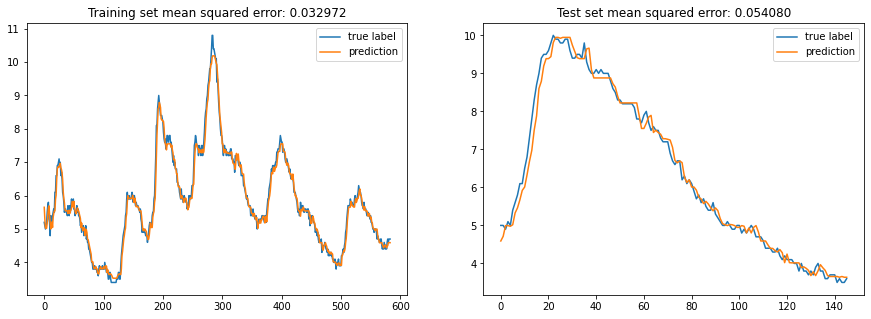

In [156]:
xgb_base.fit(xg_x_train_and_val, xg_y_train_and_val)
xgb_train_prediction = xgb_base.predict(xg_x_train_and_val)
xgb_train_mse = mean_squared_error(xgb_train_prediction, xg_y_train_and_val)
xgb_test_prediction = xgb_base.predict(xg_testX)
xgb_test_mse = mean_squared_error(xgb_test_prediction, xg_testy)
print("Train mse:" , xgb_train_mse)
print("Test mse:", xgb_test_mse)
xgb_test_mae = mean_absolute_error(xgb_test_prediction, xg_testy)
xgb_train_mae = mean_absolute_error(xgb_train_prediction, xg_y_train_and_val)
print("Train mae:", xgb_train_mae)
print("Test mae:", xgb_test_mae)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(xg_y_train_and_val, label = "true label")
axes[0].plot(xgb_train_prediction, label = "prediction")
axes[0].legend()
axes[0].set_title("Training set mean squared error: %f" % xgb_train_mse)
axes[1].plot(xg_testy, label = "true label")
axes[1].plot(xgb_test_prediction, label = "prediction")
axes[1].legend()
axes[1].set_title("Test set mean squared error: %f" % xgb_test_mse)
plt.show()

### 3.3.2 XGBoost with 11 features. 2020 data EXCLUDED

In [161]:
from sklearn.model_selection import train_test_split
ten_features = data_2020_removed[corr_featrues]
wg_xg10 = Window_generator(input_window_length=3, label_width=1, shift = 1)
train_val_df, test_df = train_test_split(ten_features, test_size=0.2, shuffle = False)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, shuffle = False)
wg_xg10.fit(train_df)
x_train_xg10, y_train_xg10, _ = wg_xg10.transform(train_df)
wg_xg10.fit(val_df)
x_val_xg10, y_val_xg10, _ = wg_xg10.transform(val_df)
wg_xg10.fit(test_df)
x_test_xg10, y_test_xg10, _ = wg_xg10.transform(test_df)

def xgb_model_fit(regressor, x_train, y_train, x_val, y_val):
    regressor.fit(x_train, y_train, eval_metric = "rmse")
    train_pred = regressor.predict(x_train)
    val_pred = regressor.predict(x_val)
    print("Train MSE:", mean_squared_error(train_pred, y_train))
    print("Val MSE:", mean_squared_error(val_pred, y_val))

In [162]:
# Since we are *NOT* using cv, for the cv parameter we input a predefinedsplit
from sklearn.model_selection import PredefinedSplit
x_train_and_val = np.vstack((x_train_xg10, x_val_xg10))
print(x_train_and_val.shape)
y_train_and_val = np.vstack((y_train_xg10, y_val_xg10))
split = [-1 for _ in range(x_train_xg10.shape[0])] + [0 for _ in range(x_val_xg10.shape[0])]
cv = PredefinedSplit(split)
for train,test in cv.split():
    print(train[-1])
    print(test[-1])

(579, 33)
464
578


In [163]:
xgb_base = XGBRegressor(learning_rate=0.1,
                         n_estimators=50,
                         max_depth=5,
                         min_child_weight=1,
                         gamma=0,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         objective= 'reg:squarederror',
                         nthread=-1,
                        )
print("Base xgb :")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)

Base xgb :
Train MSE: 0.01022034881315003
Val MSE: 0.07361756047398926


#### Hyperparameter Tuning

In [164]:
# Step 0: n_estimator and learning rate
param_test0 = {
 'n_estimator':[40, 50, 60, 70, 80],
 'learning_rate':[0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
}
gsearch0 = GridSearchCV(estimator = xgb_base, param_grid = param_test0, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
gsearch0.fit(x_train_and_val, y_train_and_val)
print("Best score:", gsearch0.best_score_)
print("Best params:", gsearch0.best_params_)
# print("result:", gsearch0.cv_results_)
print("\n")
xgb_base.set_params(**gsearch0.best_params_)
print("Xgb after oth tune:")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)

Best score: -0.03388630194263594
Best params: {'learning_rate': 0.06, 'n_estimator': 40}


Xgb after oth tune:
Train MSE: 0.1020203512068688
Val MSE: 0.03388630194263594


In [165]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb_base, param_grid = param_test1, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
gsearch1.fit(x_train_and_val, y_train_and_val)
print("Best score:", gsearch1.best_score_)
print("Best params:", gsearch1.best_params_)
# print("result:", gsearch1.cv_results_)
print("\n")
xgb_base.set_params(**gsearch1.best_params_)
print("Xgb after 1st tune:")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)

Best score: -0.028913756970813057
Best params: {'max_depth': 7, 'min_child_weight': 5}


Xgb after 1st tune:
Train MSE: 0.10241825225768886
Val MSE: 0.028913756970813057


In [167]:
param_test2 = {
 'max_depth':[5,6,7,8,9]
}
gsearch2 = GridSearchCV(estimator = xgb_base, param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
gsearch2.fit(x_train_and_val, y_train_and_val)
print("Best score:", gsearch2.best_score_)
print("Best params:", gsearch2.best_params_)
# print("result:", gsearch2.cv_results_)
print("\n")
xgb_base.set_params(**gsearch2.best_params_)
print("Xgb after 2nd tune:")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)


Best score: -0.028913756970813057
Best params: {'max_depth': 7}


Xgb after 2nd tune:
Train MSE: 0.10241825225768886
Val MSE: 0.028913756970813057


In [168]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb_base, param_grid = param_test3, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
gsearch3.fit(x_train_and_val, y_train_and_val)
print("Best score:", gsearch3.best_score_)
print("Best params:", gsearch3.best_params_)
# print("result:", gsearch3.cv_results_)
print("\n")
xgb_base.set_params(**gsearch3.best_params_)
print("Xgb after 3rd tune:")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)

Best score: -0.028913756970813057
Best params: {'gamma': 0.0}


Xgb after 3rd tune:
Train MSE: 0.10241825225768886
Val MSE: 0.028913756970813057


In [169]:
param_test4 = {
 'subsample':[i/10.0 for i in range(4,10)],
 'colsample_bytree':[i/10.0 for i in range(4,10)]
}
gsearch4 = GridSearchCV(estimator = xgb_base, param_grid = param_test4, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
gsearch4.fit(x_train_and_val, y_train_and_val)
print("Best score:", gsearch4.best_score_)
print("Best params:", gsearch4.best_params_)
# print("result:", gsearch4.cv_results_)
print("\n")
xgb_base.set_params(**gsearch4.best_params_)
print("Xgb after 4th tune:")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)

Best score: -0.02658630049185656
Best params: {'colsample_bytree': 0.9, 'subsample': 0.8}


Xgb after 4th tune:
Train MSE: 0.10207169495983685
Val MSE: 0.02658630049185656


In [170]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]
}
gsearch5 = GridSearchCV(estimator = xgb_base, param_grid = param_test5, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
gsearch5.fit(x_train_and_val, y_train_and_val)
print("Best score:", gsearch5.best_score_)
print("Best params:", gsearch5.best_params_)
# print("result:", gsearch5.cv_results_)
print("\n")
xgb_base.set_params(**gsearch5.best_params_)
print("Xgb after 5th tune:")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)

Best score: -0.02633914362108044
Best params: {'reg_alpha': 0.1}


Xgb after 5th tune:
Train MSE: 0.10413160557248236
Val MSE: 0.02633914362108044


In [171]:
param_test6 = {
 'reg_alpha':[i/10 for i in range(10)] + [i/100 for i in range(10)]
}
gsearch6 = GridSearchCV(estimator = xgb_base, param_grid = param_test6, scoring='neg_mean_squared_error', n_jobs=4, cv=cv)
gsearch6.fit(x_train_and_val, y_train_and_val)
print("Best score:", gsearch6.best_score_)
print("Best params:", gsearch6.best_params_)
# print("result:", gsearch6.cv_results_)
print("\n")
xgb_base.set_params(**gsearch6.best_params_)
print("Xgb after 6th tune:")
xgb_model_fit(xgb_base, x_train_xg10, y_train_xg10, x_val_xg10, y_val_xg10)

Best score: -0.02231966196726996
Best params: {'reg_alpha': 0.06}


Xgb after 6th tune:
Train MSE: 0.10312936083949245
Val MSE: 0.02231966196726996


Train mse: 0.1059975290804234
Test mse: 0.05560654851400063
Train mae: 0.2744755455755418
Test mae: 0.1880907091829512


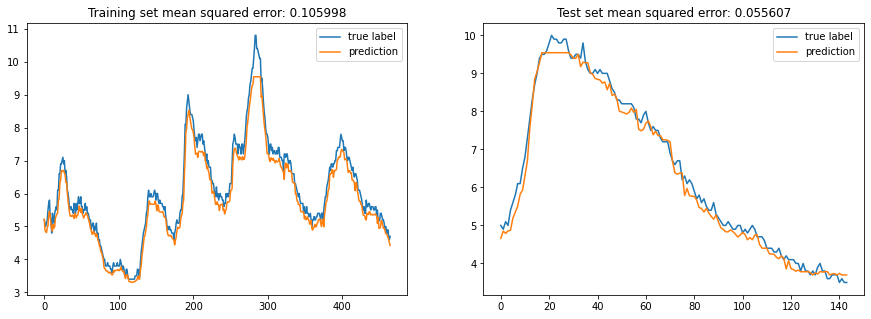

In [172]:
wg_xg10.fit(train_val_df)
x_train_full, y_train_full, columns_ = wg_xg10.transform(train_val_df)
xgb_base.fit(x_train_full, y_train_full)
train_prediction = xgb_base.predict(x_train_xg10)
train_mse = mean_squared_error(train_prediction , y_train_xg10)
test_prediction = xgb_base.predict(x_test_xg10)
test_mse = mean_squared_error(test_prediction, y_test_xg10)
print("Train mse:", train_mse)
print("Test mse:", test_mse)
test_mae = mean_absolute_error(test_prediction, y_test_xg10)
train_mae = mean_absolute_error(train_prediction , y_train_xg10)
print("Train mae:", train_mae)
print("Test mae:", test_mae)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(y_train_xg10, label = "true label")
axes[0].plot(train_prediction, label = "prediction")
axes[0].legend()
axes[0].set_title("Training set mean squared error: %f" % train_mse)
axes[1].plot(y_test_xg10, label = "true label")
axes[1].plot(test_prediction, label = "prediction")
axes[1].legend()
axes[1].set_title("Test set mean squared error: %f" % test_mse)
plt.show()

## 4. ARIMA

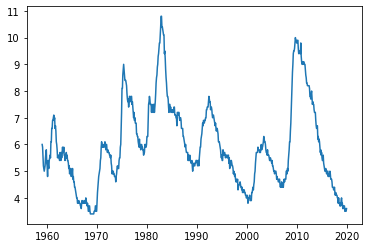

In [183]:
predictors = pd.read_csv("Econ_predictors_2020-08.csv")
predictors.sasdate = pd.to_datetime(predictors.sasdate, infer_datetime_format=True)
time_series = predictors[["sasdate", "UNRATE"]][:-7]
plt.plot(time_series["sasdate"], time_series["UNRATE"])

In [184]:
time_series["year"] = [d.year for d in time_series.sasdate]
time_series["month"] = [d.month for d in time_series.sasdate]

<AxesSubplot:xlabel='month', ylabel='UNRATE'>

<Figure size 1280x960 with 0 Axes>

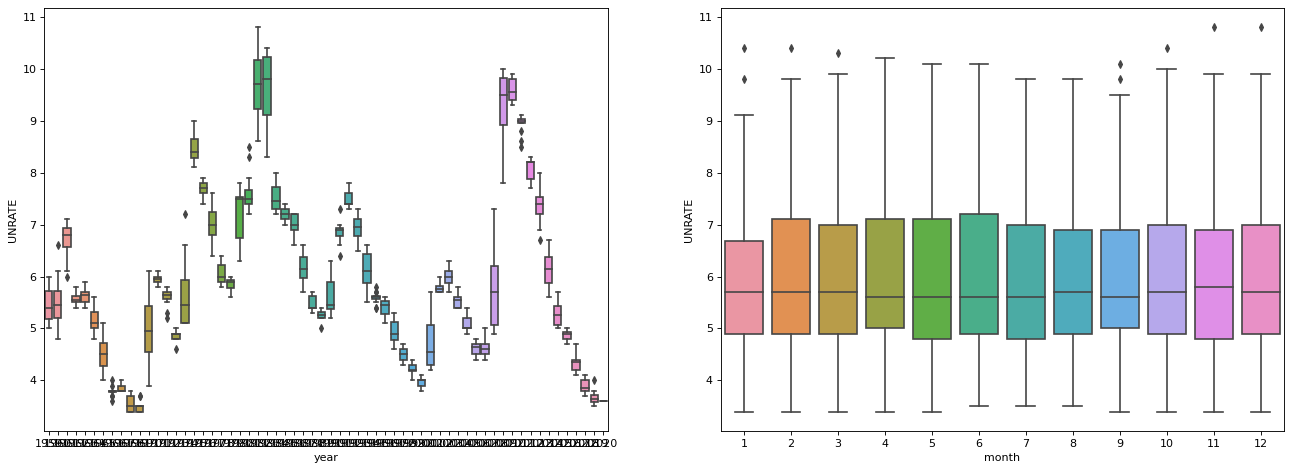

In [185]:
plt.figure(figsize=(16,12), dpi= 80)
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot("year", "UNRATE", data = time_series, ax=axes[0])
sns.boxplot("month", "UNRATE", data = time_series, ax=axes[1])

#### No seasonality observed

Reference

[5] Kashnitsky. “Topic 9. Part 1. Time Series Analysis in Python.” *Kaggle*, 16 June 2019, www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python. 

In [187]:
import statsmodels.formula.api as smf   
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 3)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

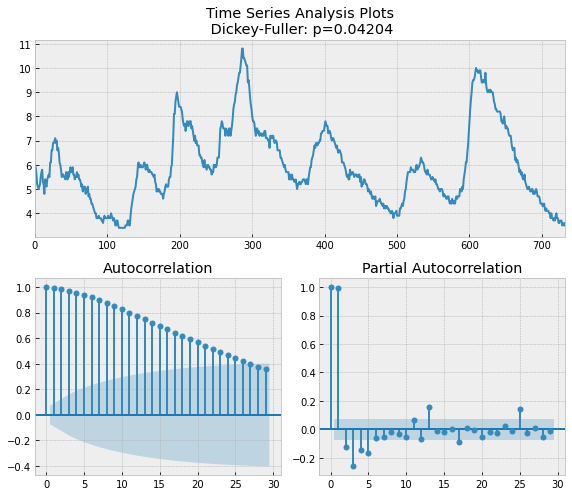

In [188]:
time_series = time_series['UNRATE']
x_train, x_test = train_test_split(time_series, test_size = 0.2, shuffle = False)
tsplot(time_series)

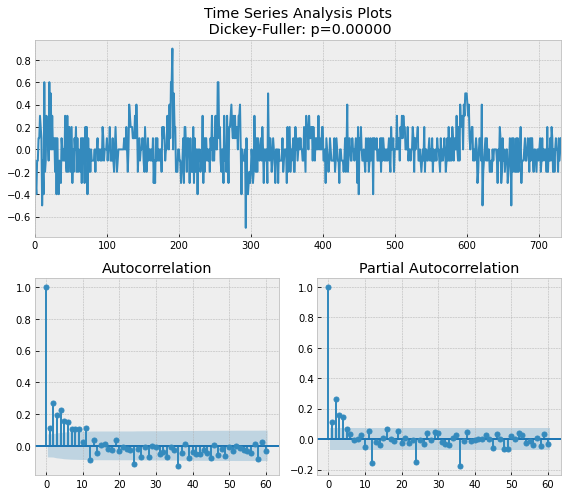

In [190]:
def diff(series, diff_length):
    if type(series) != pd.Series:
        series = pd.Series(series)
    return pd.Series(series[diff_length:].values - series[:-diff_length].values)
diff_12m = diff(time_series, 1)
tsplot(diff_12m, lags=60)

In [192]:
from itertools import product
import tqdm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

def fitSARIMA(series, parameters_list, s):
    results = []
    best_aic = float("inf")

    for param in tqdm.tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(series, order=(param[0], param[4], param[1]), 
                                            seasonal_order=(param[2], param[5], param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
p = range(12)
q = range(12)
P = range(1)
Q = range(1)
d = range(1, 2)
D = range(1)
param_list = list(product(p, q, P, Q, d, D))

In [193]:
result_table = fitSARIMA(x_train, param_list, s = 12)
print(result_table)


              parameters         aic
0     (5, 9, 0, 0, 1, 0) -436.113024
1     (6, 9, 0, 0, 1, 0) -434.615822
2    (11, 9, 0, 0, 1, 0) -433.984843
3    (5, 10, 0, 0, 1, 0) -433.395553
4     (4, 9, 0, 0, 1, 0) -433.269492
..                   ...         ...
139   (0, 3, 0, 0, 1, 0) -390.014270
140   (0, 2, 0, 0, 1, 0) -380.716844
141   (1, 0, 0, 0, 1, 0) -357.225921
142   (0, 1, 0, 0, 1, 0) -356.216901
143   (0, 0, 0, 0, 1, 0) -356.129632

[144 rows x 2 columns]


In [194]:
p, q, P, Q, d, D = result_table.parameters[0]
best_model=sm.tsa.statespace.SARIMAX(x_train, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, 12)).fit(disp=-1)
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                 UNRATE   No. Observations:                  586
Model:               SARIMAX(5, 1, 9)   Log Likelihood                 233.057
Date:                Thu, 17 Dec 2020   AIC                           -436.113
Time:                        14:56:01   BIC                           -370.539
Sample:                             0   HQIC                          -410.557
                                - 586                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5545      0.197     -2.809      0.005      -0.941      -0.168
ar.L2          0.8208      0.096      8.577      0.000       0.633       1.008
ar.L3          0.2759      0.242      1.139      0.2

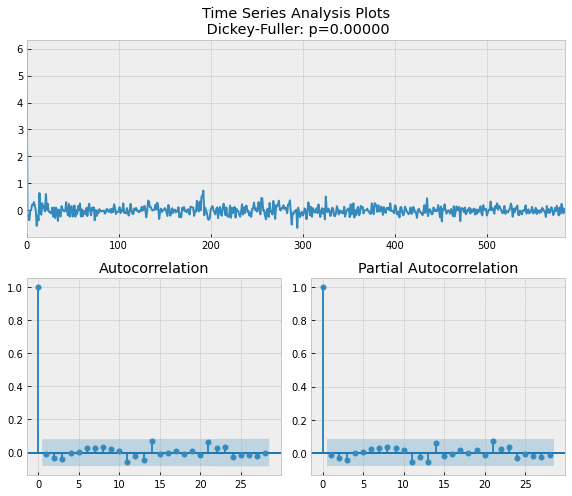

In [195]:
tsplot(best_model.resid[:])

In [198]:
def plotSARIMA(x_train, x_test, model, n_steps, s = 12, d = 1):
    train_predict = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model due to the differentiating
    train_error = mean_squared_error(train_predict[d:], x_train[d:])
    print("Train error:", train_error)
    # forecasting on n_steps forward 
    forecast = model.predict(start = x_train.shape[0], end = x_train.shape[0] + x_test.shape[0] - 1)
    # calculate error, again having shifted on s+d steps from the beginning
    test_error = mean_squared_error(forecast, x_test)
    print("Test error:", test_error)
    
    plt.figure(figsize=(15, 7))
    plt.title("Mean Squared Error: {0:.2f}".format(test_error))
    plt.plot(x_train, color = 'blue', label = 'actual')
    plt.plot(x_test, color = 'blue')
    plt.plot(train_predict, color = 'r', label = "train predict")
    plt.plot(forecast, color = 'orange', label = "forecast")
    plt.legend()
    plt.grid(True);

Train error: 0.026518849368107517
Test error: 7.171021723288865


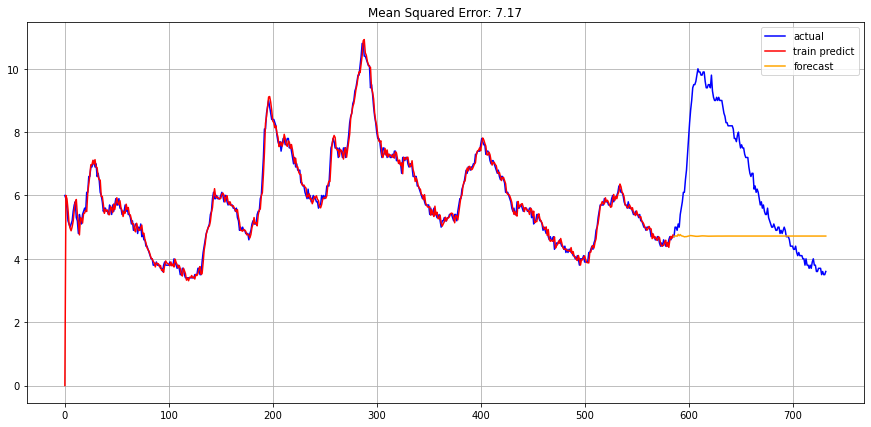

In [199]:
plotSARIMA(x_train, x_test, best_model, 0)